# Quick Guide

Import the multitool library a start working with its help in tasks such as those mentioned here below:

In [1]:
import molsysmt as molsysmt

## Fetching molecular systems from web databases

You probably don't remember how to fetch a pdb from the protein data bank to be loaded in your script as a parmed, pdbfixer, mdtraj, nglview, pytraj or mdanalysis native object -just to mention some-. MolSysMT has a unique command to do it:

In [2]:
system_parmed     = molsysmt.fetch('pdb:1sux',form='parmed')
system_pdbfixer   = molsysmt.fetch('pdb:1sux',form='pdbfixer')
system_mdtraj     = molsysmt.fetch('pdb:1sux',form='mdtraj')
system_mdanalysis = molsysmt.fetch('pdb:1sux',form='mdanalysis')
system_nglview    = molsysmt.fetch('pdb:1sux',form='nglview')
system_pytraj     = molsysmt.fetch('pdb:1sux',form='pytraj')

The class, or in MolSysMT syntaxis, the form of each object can be checked as:

In [3]:
print(molsysmt.get_form(system_parmed))
print(molsysmt.get_form(system_pdbfixer))
print(molsysmt.get_form(system_mdtraj))
print(molsysmt.get_form(system_mdanalysis))
print(molsysmt.get_form(system_nglview))
print(molsysmt.get_form(system_pytraj))

parmed.Structure
pdbfixer.PDBFixer
mdtraj.Trajectory
mdanalysis.Universe
nglview


## Loading molecular systems and trajectories

Some files with different formats of molecular systems are stored in MolSysMT as example:

In [4]:
molsysmt.utils.examples.pdb

{'1l2y': '/home/diego/Myusr/src/UIBCDFGitHub/LabTools/MolSysMT/molsysmt/utils/data/pdb/1l2y.pdb',
 '1li2': '/home/diego/Myusr/src/UIBCDFGitHub/LabTools/MolSysMT/molsysmt/utils/data/pdb/1li2.pdb'}

In [5]:
molsysmt.utils.examples.mol2

{'caffeine': '/home/diego/Myusr/src/UIBCDFGitHub/LabTools/MolSysMT/molsysmt/utils/data/mol2/caffeine.mol2'}

Lets work with some of the to show how MolSysMT can load them in several forms:

In [6]:
PDB_example_file = molsysmt.utils.examples.pdb['1l2y']
MOL2_example_file = molsysmt.utils.examples.mol2['caffeine']

In [7]:
system_pdbfixer = molsysmt.load(PDB_example_file,'pdbfixer')
system_parmed   = molsysmt.load(PDB_example_file,'parmed')
system_modeller = molsysmt.load(MOL2_example_file,'modeller')
system_mdtraj   = molsysmt.load(MOL2_example_file,'mdtraj')

/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [8]:
print(molsysmt.get_form(system_pdbfixer))
print(molsysmt.get_form(system_parmed))
print(molsysmt.get_form(system_modeller))
print(molsysmt.get_form(system_mdtraj))

pdbfixer.PDBFixer
parmed.Structure
modeller.Modeller
mdtraj.Trajectory


## Converting molecular systems and trajectories

Systems can be easily converted to the native object of other libraries as:

In [9]:
system_modeller = molsysmt.convert(PDB_example_file,form='modeller')

In [10]:
molsysmt.get_form(system_modeller)

'modeller.Modeller'

In [11]:
system_mdtraj = molsysmt.convert(system_modeller,form='mdtraj')

In [12]:
molsysmt.get_form(system_mdtraj)

'mdtraj.Trajectory'

In [13]:
system_parmed = molsysmt.convert(system_mdtraj,form='parmed')

In [14]:
molsysmt.get_form(system_parmed)

'parmed.Structure'

## Working with id codes

In [ ]:
system_mdtraj = molsysmt.convert('pdb:1sux','mdtraj')

## Working with sequences

In [ ]:
system_aminoacids1 = molsysmt.convert('aminoacids3:TyrGlyGlyPheMet','aminoacids1:seq')

In [ ]:
system_aminoacids3 = molsysmt.convert('aminoacids1:YGGFM','aminoacids3:seq')

In [ ]:
system_biopython = molsysmt.convert('aminoacids1:YGGFM','biopython.SeqRecord')

## Writting molecular systems or trajectories as files

In [15]:
system_parmed   = molsysmt.load(PDB_example_file,'parmed')

In [16]:
molsysmt.write(system_parmed,'foo.mol2')

In [ ]:
molsysmt.convert('pdb:1sux','1sux.pdb')

In [ ]:
molsysmt.convert('aminoacids1:YGGFM','metenk.fasta')

In [17]:
from os import remove
remove('foo.mol2','1sux.pdb','metenk.fasta')

## Atoms selection

In [18]:
system_mdtraj     = molsysmt.load(PDB_example_file,'mdtraj')
system_pdbfixer   = molsysmt.load(PDB_example_file,'pdbfixer')
system_mdanalysis = molsysmt.load(PDB_example_file,'mdanalysis')
system_parmed     = molsysmt.load(PDB_example_file,'parmed')

/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [19]:
molsysmt.select(system_mdtraj,'name CA and resid 10 to 20')

array([177, 184, 198, 209, 220, 227, 251, 265, 279, 293])

In [20]:
molsysmt.select(system_pdbfixer,'name CA and resid 10 to 20')

array([177, 184, 198, 209, 220, 227, 251, 265, 279, 293])

In [21]:
molsysmt.select(system_mdanalysis,'name CA and resid 10 to 20')

/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/mdtraj/utils/unitcell.py:78: UserWarning: All your angles were less than 2*pi. Did you accidentally give me radians?
  warnings.warn('All your angles were less than 2*pi. Did you accidentally give me radians?')
/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/mdtraj/utils/unitcell.py:87: RuntimeWarning: invalid value encountered in true_divide
  cy = c_length*(np.cos(alpha) - np.cos(beta)*np.cos(gamma)) / np.sin(gamma)
/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/mdtraj/utils/unitcell.py:99: RuntimeWarning: invalid value encountered in greater
  c[np.logical_and(c>-tol, c<tol)] = 0.0
/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/site-packages/mdtraj/utils/unitcell.py:99: RuntimeWarning: invalid value encountered in less
  c[np.logical_and(c>-tol, c<tol)] = 0.0
/home/diego/Myusr/opt/miniconda3/envs/MolSysMT_dev/lib/python3.6/si

array([177, 184, 198, 209, 220, 227, 251, 265, 279, 293])

In [22]:
molsysmt.select(system_parmed,'name CA and resid 10 to 20')

array([177, 184, 198, 209, 220, 227, 251, 265, 279, 293])

In [23]:
molsysmt.select(PDB_example_file,'name CA and resid 10 to 20')

array([177, 184, 198, 209, 220, 227, 251, 265, 279, 293])

In [24]:
molsysmt.select("pdb:1l2y",'name CA and resid 10 to 20')

array([177, 184, 198, 209, 220, 227, 251, 265, 279, 293])

In [25]:
molsysmt.select(system_mdanalysis,'name CA and (resid 10:20)','mdanalysis')

array([171, 178, 185, 199, 210, 221, 228, 252, 266, 280, 294])

In [26]:
molsysmt.select(system_parmed,':10-20@CA','parmed')

[170, 177, 184, 198, 209, 220, 227, 251, 265, 279, 293]

## Viewing molecular systems and trajectories

In [27]:
view=molsysmt.view(MOL2_example_file)
view

NGLWidget()

In [28]:
view.render_image()

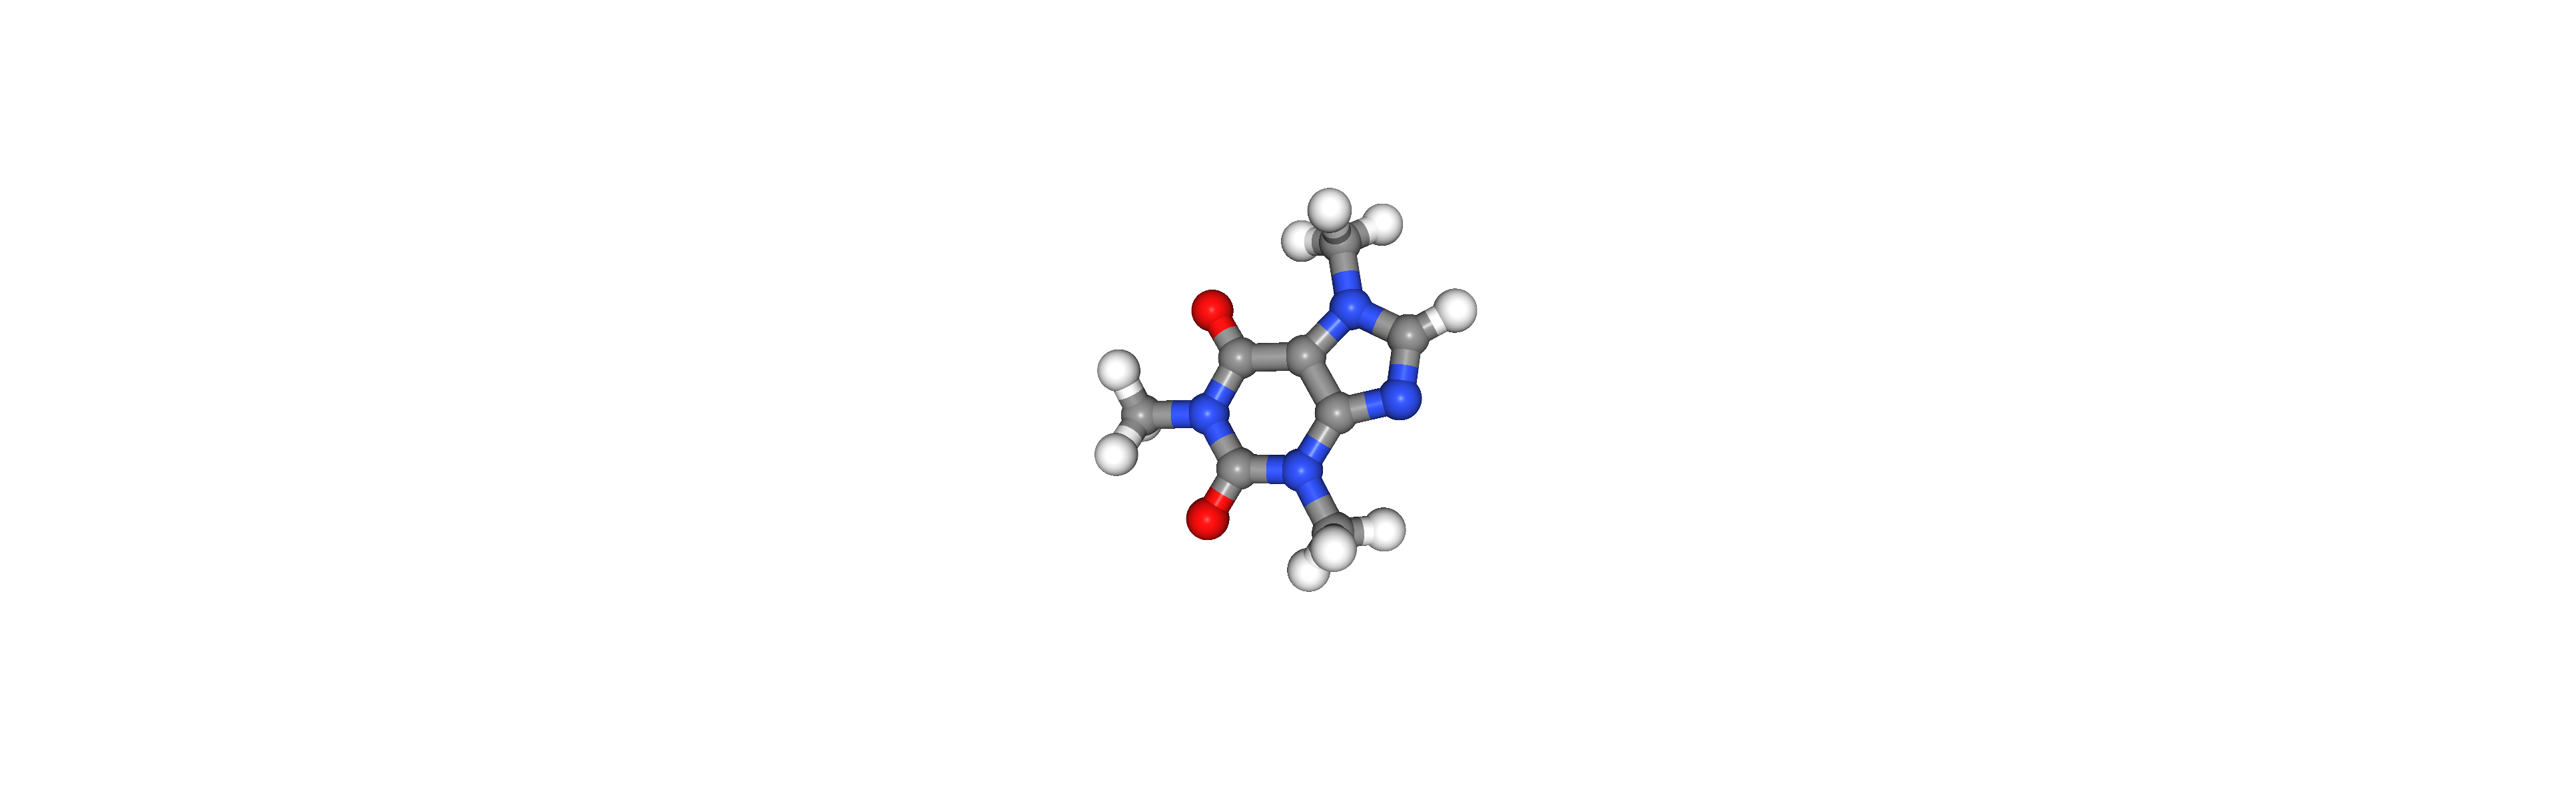

In [29]:
view._display_image()

In [30]:
view=molsysmt.view('pdb:1l2y')
view

NGLWidget()

In [31]:
view.render_image()

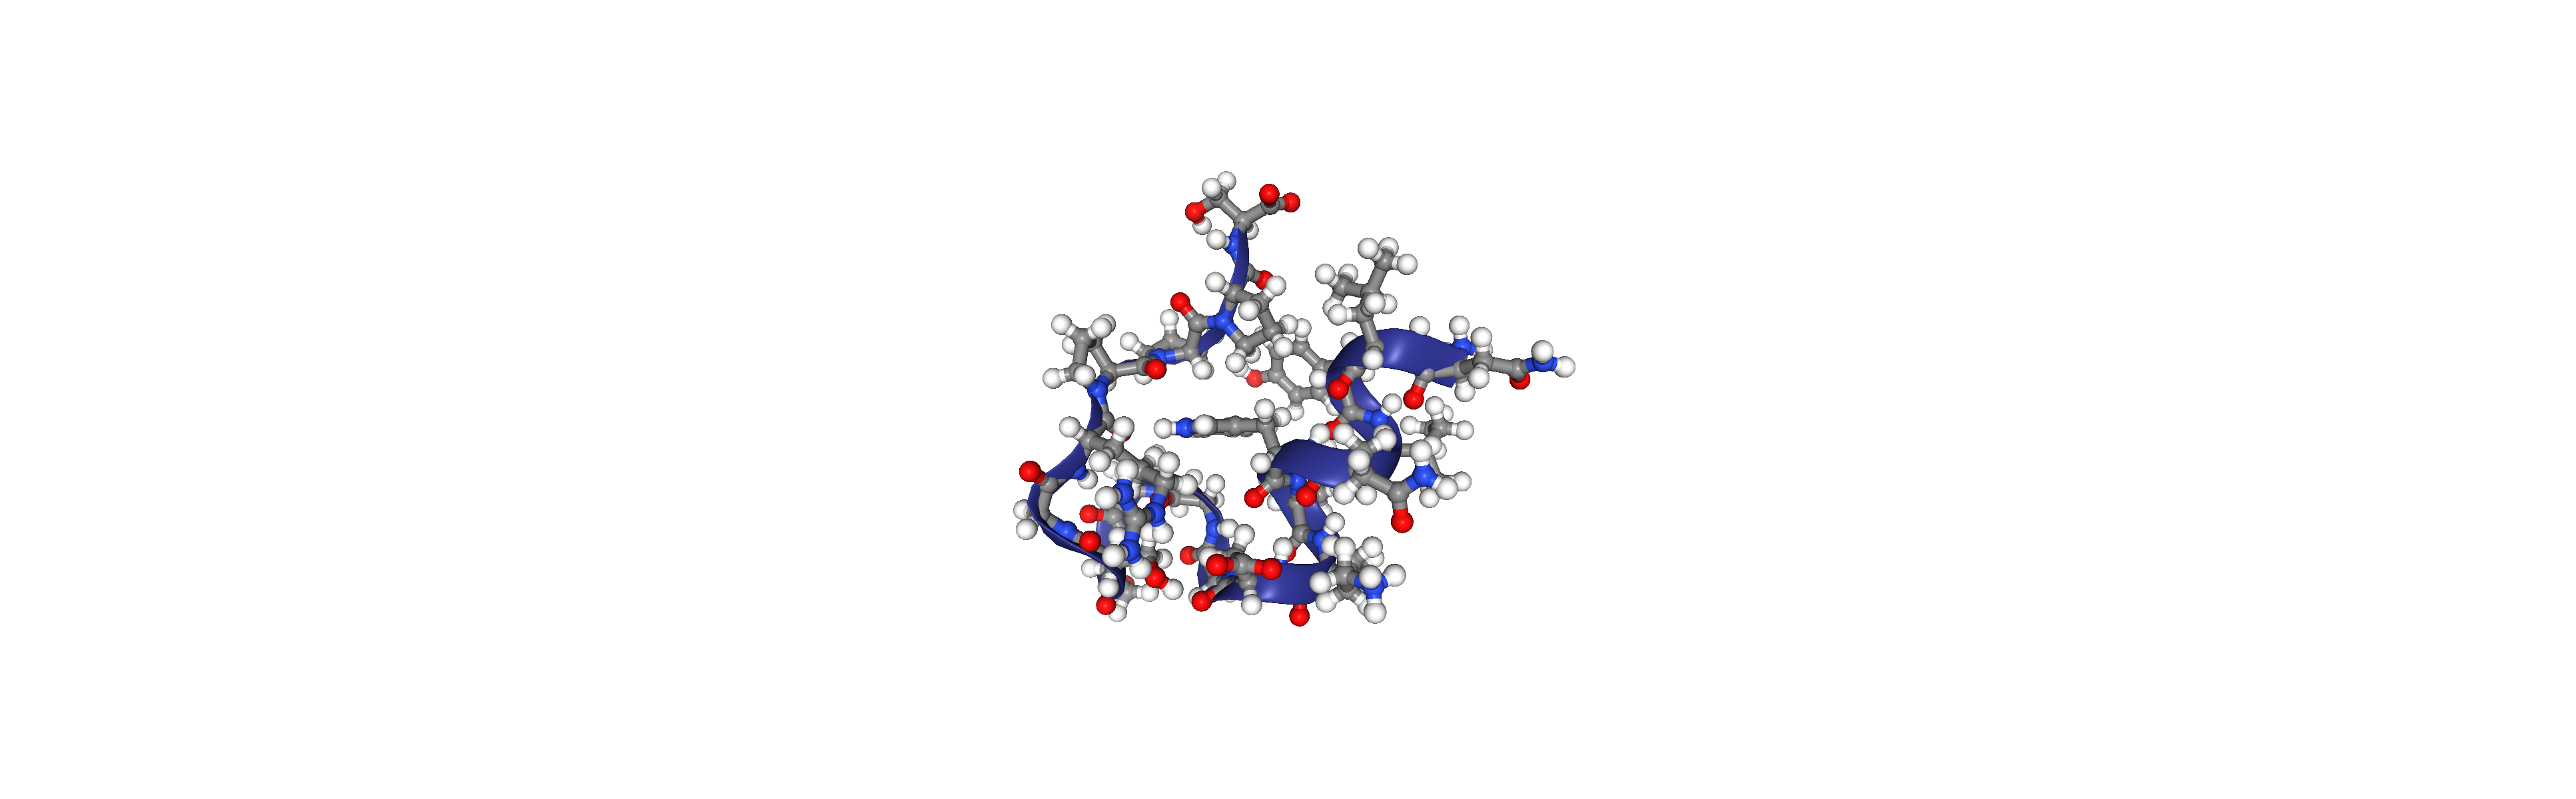

In [32]:
view._display_image()

In [33]:
system_pdbfixer = molsysmt.load(PDB_example_file,'pdbfixer')
view=molsysmt.view(system_pdbfixer)
view

NGLWidget()

In [34]:
view.render_image()

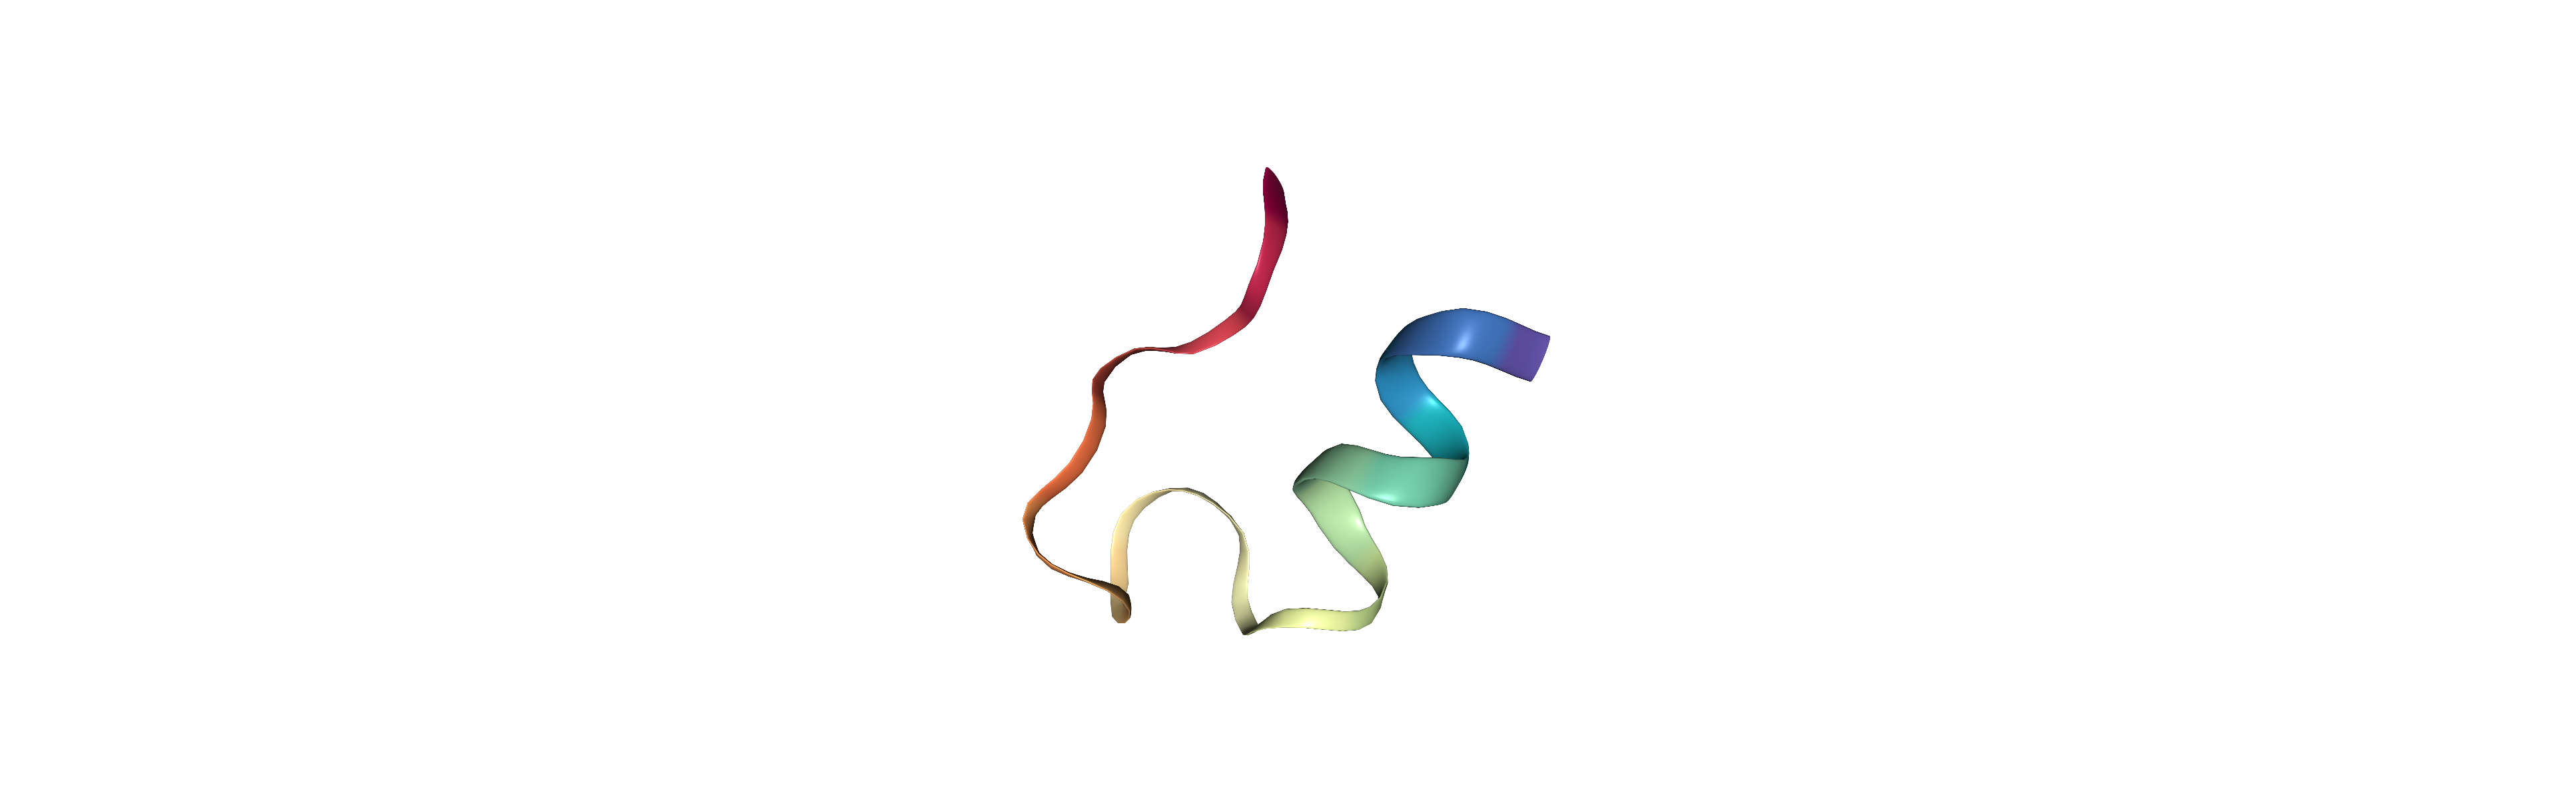

In [35]:
view._display_image()

## Molecular systems as MolSysMT's forms

MolSysMT's works with methods as `load` or `convert` over different forms of a  molecular model. This way, the same molecular model can take de form of a pdb file, a parmed structure or a pytraj object. In order to list the different forms MolSysMT currently recognize, check the method `info_forms`:

In [36]:
molsysmt.info_forms()

{'engines': ['mdanalysis',
  'mdtraj',
  'modeller',
  'native',
  'openmm',
  'parmed',
  'pdbfixer'],
 'classes': ['mdanalysis.Universe',
  'mdtraj.Topology',
  'mdtraj.Trajectory',
  'modeller.Modeller',
  'moldyn.Native',
  'molsys.Native',
  'openmm.Positions',
  'openmm.Topology',
  'parmed.Structure',
  'pdbfixer.PDBFixer',
  'yank.Topography'],
 'files': ['dcd', 'ddb', 'h5', 'mol2', 'pdb', 'sdf', 'smi', 'xtc'],
 'ids': ['pdb:id']}

In addition the list of forms which can be loaded to another given form can be checked with:

In [37]:
molsysmt.info_load(to_form='pdb')

['mdanalysis.Universe', 'mdtraj.Trajectory', 'modeller.Modeller', 'mol2', 'molsys.Native', 'parmed', 'parmed.Structure', 'pdb:id', 'pdbfixer.PDBFixer']


And the other way around, the lisf of forms a given form can be loaded as can also be checked with:

In [38]:
molsysmt.info_load(from_form='pdbfixer')

['mdtraj']
